## Simple ODE with known analytic solution

$$
\frac{dx}{dt} = f(t, x),
\quad t \in [0, 10],
\quad x \in R^2
$$

$$
x(t) = a \sin(\omega t + \phi)
$$

$$
f(t, x) = a \omega \cos(\omega t + \phi)
$$

$$
a = \begin{bmatrix}
    1. \\
    2.
\end{bmatrix},
\quad
\omega = \begin{bmatrix}
    1.    \\
    \pi/2
\end{bmatrix},
\quad
\phi = \begin{bmatrix}
    \pi/4 \\
    \pi/2
\end{bmatrix},
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('./../lib')

from equation import Equation
from solver import Solver

In [2]:
# Equation parameters

d = 2
q = 2
m = 1

a = np.array([1., 2.])
o = np.array([1., np.pi/2])
p = np.array([np.pi/4., np.pi/2])

def s(t, x):  return np.zeros((d, q))
def f(t, x):  return a * o * np.cos(o*t + p)
def fx(t, x): return  -1. * a * o**2 * np.sin(o*t + p)
def xr(t, w): return a * np.sin(o*t + p)

t_min = 0.
t_max = 10.
t_poi = 1000

x0 = np.array(xr(t_min, None))
r0 = None

In [3]:
EQ = Equation(x0, r0, d, q, m, t_min, t_max, t_poi).prep(s, f, fx, xr)

In [5]:
SL = Solver(EQ)
SL.solve_ode()

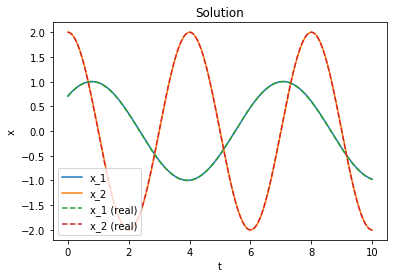

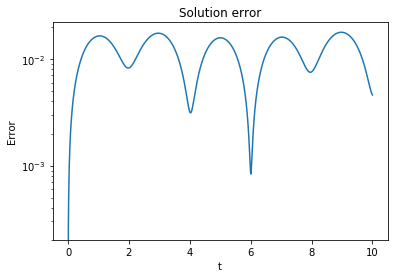

In [10]:
EQ.plot_x_vs_t()
EQ.plot_x_err_vs_t()